## Fiddler 使用与异常总结(1)

### 1、fiddler的简单使用

（fiddler使用已有一段时间，具体使用细节慢慢补充）
Fiddler是一个http协议调试代理工具，它能够记录客户端和服务器之间的所有 HTTP请求，可以针对特定的HTTP请求，分析请求数据、设置断点、调试web应用、修改请求的数据，甚至可以修改服务器返回的数据，功能非常强大，是web调试与爬虫抓包的利器。
## Fiddler工作原理:## 
Fiddler是以代理web服务器的形式工作的,它使用代理地址:127.0.0.1,端口:8888. 当Fiddler启动后将自己变成一个代理服务器,这个代理服务器默认监听127.0.0.1:8888.然后打开IE的时候,IE浏览器会向代理服务器发请求（也就是向127.0.0.1:8888请求，然后由fiddler向Internet上的服务器发请求获取响应，在返回给浏览器）。Fiddler退出的时候,会自动注销代理，这样就不会影响别的程序。不过如果Fiddler非正常退出，这时候因为Fiddler没有自动注销，会造成网页无法访问。Fiddler的具体工作原理如下：

首先fiddler截获客户端浏览器发送给服务器的https请求， 此时还未建立握手。
第一步， fiddler向服务器发送请求进行握手， 获取到服务器的CA证书， 用根证书公钥进行解密， 验证服务器数据签名， 获取到服务器CA证书公钥。
第二步， fiddler伪造自己的CA证书， 冒充服务器证书传递给客户端浏览器， 客户端浏览器做跟fiddler一样的事。
第三步， 客户端浏览器生成https通信用的对称密钥， 用fiddler伪造的证书公钥加密后传递给服务器， 被fiddler截获。
第四步， fiddler将截获的密文用自己伪造证书的私钥解开， 获得https通信用的对称密钥。
第五步， fiddler将对称密钥用服务器证书公钥加密传递给服务器， 服务器用私钥解开后建立信任， 握手完成， 用对称密钥加密消息， 开始通信。
第六步， fiddler接收到服务器发送的密文， 用对称密钥解开， 获得服务器发送的明文。再次加密， 发送给客户端浏览器。
第七步， 客户端向服务器发送消息， 用对称密钥加密， 被fidller截获后， 解密获得明文。
由于fiddler一直拥有通信用对称密钥， 所以在整个https通信过程中信息对其透明。

## Fiddler设置##
Fiddler 抓取 Https 设置

1、启动Fiddler，打开菜单栏中的 Tools > Options 。<br>
                
2、打开工具栏->Tools->Options->HTTPS <br>
        3.1.1：选中Capture HTTPS CONNECTs (捕捉HTTPS连接)，<br>
        3.1.2：选中Decrypt HTTPS traffic（解密HTTPS通信）<br>
        3.1.3：我们要用Fiddler获取本机所有进程的HTTPS请求，所以中间的下拉菜单中选中...from all processes <br>
        3.1.4：选中下方Ignore server certificate errors（忽略服务器证书错误）<br>
        3.1.5：在Actions 里为 Fiddler 配置Windows信任这个根证书解决安全警告：Trust Root Certificate ，<br>
                    在mac 上运行 Fiddler 是没有这个选项的，不用选择即可<br>
                
3、Fiddler 主菜单 Tools -> Options> Connections<br>
       3.2.1: 选中Allow remote computers to connect（允许远程连接）<br>
       3.2.2: Act as system proxy on startup（作为系统启动代理）<br>
                    
4、重启Fiddler，使配置生效（这一步很重要，必须做)<br>
5、Fiddler 如何捕获 Chrome的会话<br>
安装SwitchyOmega 代理管理 Chrome 浏览器插件<br>
       5.1.1：在Chrome 应用商城即可添加插件<br>
                   
6、添加好插件后，打开SwitchyOmega点击新建情景模式，如图所示，设置代理服务器为127.0.0.1:8888<br>
    设置好后，点击应用选项保存即可<br>
                                    
7、通过浏览器插件切换为设置好的代理，请注意(这里如果不需要，你设置的代理，请切换成 auto switch) 不然会影响浏览器正常使用，无法访问网页<br>                      
8、切换成你设置好的代理之后，打开Fiddler，在浏览器输入你要访问的Https请求，操作即可，Fiddler会自动拦截信息<br>
             

### 2、 fiddler代理的异常

##### 从代理的原理到解决办法

一般能支持HTTP代理的任意程序的数据包都能被Fiddler嗅探到，Fiddler的运行机制其实就是本机上监听8888端口的HTTP代理。Fiddler启动的时候默认将浏览器（IE）的代理设置为127.0.0.1:8888，而其他浏览器是需要手动设置的，所以将浏览器的代理改为127.0.0.1:8888就可以监听数据了。
###### 本次遇到的问题是：装好fiddler时可以浏览器上网，也可以fiddler抓包，但现在突然出现fiddler无法抓包，使用代理时浏览器也无法上网的异常
判断异常原因：fiddler设置没有问题，使用代理时无法上网，但电脑有网，浏览器代理设置上了但没有正常工作！(浏览器代理到Fiddler代理之间通信异常)<br>
解决办法：认真检查浏览器与Fiddler的代理设置没有问题后，决定查看代理端口的使用情况，具体方法如下：<br>
1、查看电脑端口占用情况命令：netstat -an <br>
2、查看特定端口占用情况的命令：netstat -aon|findstr  "端口号"（此处查看fiddler默认端口8888）<br>
下图所示结果截图：(以第一行列：TCP表示传输层通讯协议，接下来是本机地址或主机名称与端口号、远程主机地址或主机名称与端口号，以及进程PID号)<br>
端口的状态信息有4种：<br>
LISTENING：当前正在监听<br>
ESTABLISHED： 已建立连接，正在通信<br>
TIME_WAIT：已结束访问<br>
CLOSE_WAIT：等待从本地用户发来的连接中断请求<br>
了解更多关于netstat的使用方法命令：netstat -help
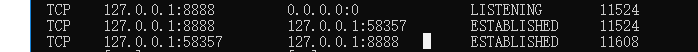
查看占用8888端口的进程，发现是Python进程，查资料发现IPython使用的是8888端口。找到问题原因，修改Fiddler与浏览器代理端口为其他端口后，问题解决。
附python开发常见端口号：<br>
端口范围 0-65535
系统的预留或占用端口 0-1024
MySQL默认端口 3306<br>
Redis默认端口 6379<br>
MongoDB默认端口 27017<br>
django端口 8000<br>
flask端口 5000<br>
pyspider服务端口 5000（由flask开发）<br>
gerapy服务端口 8000（由django开发）<br>
scrapyd服务端口 6800<br>
ipython notebook 默认端口 8888<br>
HTTP默认端口 80<br>
HTTPS服务默认端口443<br>
NNTP 帖子  119<br>
FTP  文件传输  20<br>
SMTP 发送邮件  25<br>
ssh  安全协议  22<br>
POP3  接收邮件  110<br>
IMAP4   获取邮件  143<br>
Telnet  命令行  23   <br> 
Gopher   信息查找  70<br>

